# Transport Mode Classification using BiLSTM (RNN) at Random Seeds

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary

from src.engine import biLSTM_engine
from src.model_transportMode import BiLSTMNetwork
from src.plot import plot_history, plot_endgame_history
from src.dataset import TransportModeDataset

from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import DataLoader, random_split

**Getting random seeds**

In [2]:
np.random.seed(0)

np.random.randint(low=0, high=200, size=4)

array([172,  47, 117, 192])

Computing class weights

In [3]:
y_train = pd.read_csv('./data/lstm_features_labels/train/metadata.csv')
y_train = y_train.iloc[:,1].values
print('Classes:', np.unique(y_train))

class_weights = torch.tensor(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train), dtype=torch.float32)
class_weights = class_weights / class_weights.sum()
class_weights = class_weights.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

print('Class weights:', class_weights)
del y_train

Classes: [0. 1. 2. 3. 4. 5. 6. 7.]
Class weights: tensor([0.0521, 0.0592, 0.4732, 0.1143, 0.0655, 0.1070, 0.0639, 0.0648],
       device='cuda:0')


## Seed 172

In [4]:
base_dir = './data/lstm_features_labels/'

train_datasets = TransportModeDataset(base_dir, mode='train')
val_test_datasets = TransportModeDataset(base_dir, mode='valid')

np.random.seed(172)
valid_datasets, test_datasets = random_split(val_test_datasets, [0.5, 0.5])

batch_size = 64
train_dl = DataLoader(train_datasets, batch_size, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_datasets, batch_size, shuffle=True, num_workers=4)
test_dl = DataLoader(test_datasets, batch_size, shuffle=False, num_workers=2)

In [5]:
np.random.seed(172)

criterion = nn.CrossEntropyLoss(weight=class_weights)
model = BiLSTMNetwork(input_size=6, hidden_size=300, num_layers=1, dropout=0.494697) #drop is technically == 0 since n_layers == 1
optimizer = optim.AdamW(model.parameters(), lr=0.00769697, weight_decay=0.0756331)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.931817)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

In [6]:
engine = biLSTM_engine(model, optimizer, scheduler, criterion, device)

Train time: 44mins 55.6s

In [7]:
np.random.seed(172)

seed_172_hist = engine.train_validation(train_dl, valid_dl, epochs=40, save_path='./model_checkpoint/seed_172_transpMode_BiLSTM_chkpt.pth')

np.save('./model_checkpoint/seed_172_transpMode_BiLSTM_history.npy', np.array(seed_172_hist))

   Epoch [1/40], Train Loss: 1.3489, Train Accuracy: 43.37%, Val Loss: 1.1220, Val Accuracy: 52.20%
   Epoch [2/40], Train Loss: 1.0655, Train Accuracy: 54.64%, Val Loss: 1.0986, Val Accuracy: 51.23%
   Epoch [3/40], Train Loss: 0.9321, Train Accuracy: 60.33%, Val Loss: 0.9487, Val Accuracy: 59.74%
   Epoch [4/40], Train Loss: 0.8376, Train Accuracy: 64.79%, Val Loss: 0.8931, Val Accuracy: 61.55%
   Epoch [5/40], Train Loss: 0.7900, Train Accuracy: 66.80%, Val Loss: 0.7734, Val Accuracy: 67.64%
   Epoch [6/40], Train Loss: 0.7500, Train Accuracy: 68.27%, Val Loss: 0.7780, Val Accuracy: 68.11%
   Epoch [7/40], Train Loss: 0.7273, Train Accuracy: 69.23%, Val Loss: 0.7313, Val Accuracy: 69.92%
   Epoch [8/40], Train Loss: 0.6971, Train Accuracy: 70.34%, Val Loss: 0.7595, Val Accuracy: 68.96%
   Epoch [9/40], Train Loss: 0.6767, Train Accuracy: 71.48%, Val Loss: 0.7141, Val Accuracy: 69.46%
   Epoch [10/40], Train Loss: 0.6596, Train Accuracy: 72.32%, Val Loss: 0.6848, Val Accuracy: 71.13%

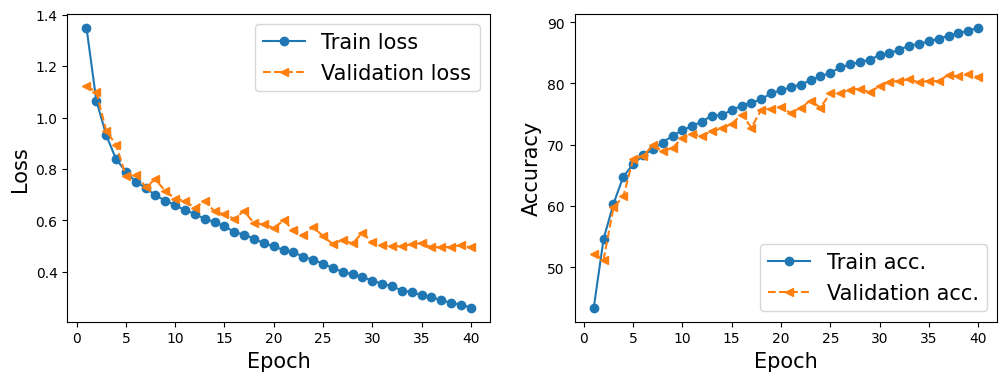

In [8]:
plot_history(seed_172_hist)

In [9]:
engine.test(test_dl)

Test Loss: 0.5072, Test Accuracy: 80.94%


(0.507206583579818, 80.93755405639163)

## Seed 47

In [10]:
base_dir = './data/lstm_features_labels/'

train_datasets = TransportModeDataset(base_dir, mode='train')
val_test_datasets = TransportModeDataset(base_dir, mode='valid')

np.random.seed(47)
valid_datasets, test_datasets = random_split(val_test_datasets, [0.5, 0.5])

batch_size = 64
train_dl = DataLoader(train_datasets, batch_size, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_datasets, batch_size, shuffle=True, num_workers=4)
test_dl = DataLoader(test_datasets, batch_size, shuffle=False, num_workers=2)

In [11]:
np.random.seed(47)

criterion = nn.CrossEntropyLoss(weight=class_weights)
model = BiLSTMNetwork(input_size=6, hidden_size=300, num_layers=1, dropout=0.494697) #drop is technically == 0 since n_layers == 1
optimizer = optim.AdamW(model.parameters(), lr=0.00769697, weight_decay=0.0756331)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.931817)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

In [12]:
engine = biLSTM_engine(model, optimizer, scheduler, criterion, device)

Train time: 41mins 44s

In [13]:
np.random.seed(47)

seed_47_hist = engine.train_validation(train_dl, valid_dl, epochs=40, save_path='./model_checkpoint/seed_47_transpMode_BiLSTM_chkpt.pth')

np.save('./model_checkpoint/seed_47_transpMode_BiLSTM_history.npy', np.array(seed_47_hist))

   Epoch [1/40], Train Loss: 1.3604, Train Accuracy: 42.42%, Val Loss: 1.1689, Val Accuracy: 51.66%
   Epoch [2/40], Train Loss: 1.1185, Train Accuracy: 53.10%, Val Loss: 1.0941, Val Accuracy: 54.69%
   Epoch [3/40], Train Loss: 1.0271, Train Accuracy: 56.50%, Val Loss: 0.9817, Val Accuracy: 57.64%
   Epoch [4/40], Train Loss: 0.9306, Train Accuracy: 60.21%, Val Loss: 0.8940, Val Accuracy: 59.77%
   Epoch [5/40], Train Loss: 0.8337, Train Accuracy: 63.96%, Val Loss: 0.7909, Val Accuracy: 65.76%
   Epoch [6/40], Train Loss: 0.7747, Train Accuracy: 66.98%, Val Loss: 0.7501, Val Accuracy: 68.75%
   Epoch [7/40], Train Loss: 0.7336, Train Accuracy: 68.70%, Val Loss: 0.7901, Val Accuracy: 69.20%
   Epoch [8/40], Train Loss: 0.7112, Train Accuracy: 69.82%, Val Loss: 0.7276, Val Accuracy: 69.94%
   Epoch [9/40], Train Loss: 0.6831, Train Accuracy: 71.01%, Val Loss: 0.7059, Val Accuracy: 70.24%
   Epoch [10/40], Train Loss: 0.6626, Train Accuracy: 72.02%, Val Loss: 0.6759, Val Accuracy: 71.48%

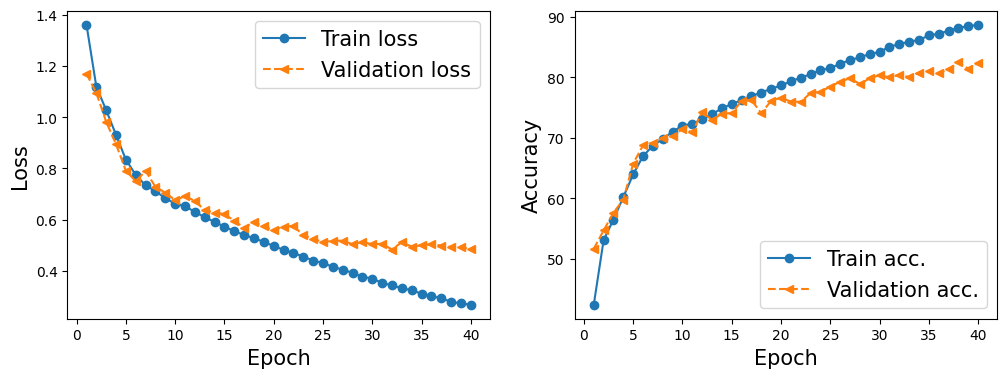

In [14]:
plot_history(seed_47_hist)

In [15]:
engine.test(test_dl)

Test Loss: 0.5075, Test Accuracy: 82.43%


(0.5075160022620316, 82.4251859539872)

## Seed 117

In [16]:
base_dir = './data/lstm_features_labels/'

train_datasets = TransportModeDataset(base_dir, mode='train')
val_test_datasets = TransportModeDataset(base_dir, mode='valid')

np.random.seed(117)
valid_datasets, test_datasets = random_split(val_test_datasets, [0.5, 0.5])

batch_size = 64
train_dl = DataLoader(train_datasets, batch_size, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_datasets, batch_size, shuffle=True, num_workers=4)
test_dl = DataLoader(test_datasets, batch_size, shuffle=False, num_workers=2)

In [17]:
np.random.seed(117)

criterion = nn.CrossEntropyLoss(weight=class_weights)
model = BiLSTMNetwork(input_size=6, hidden_size=300, num_layers=1, dropout=0.494697) #drop is technically == 0 since n_layers == 1
optimizer = optim.AdamW(model.parameters(), lr=0.00769697, weight_decay=0.0756331)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.931817)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

In [18]:
engine = biLSTM_engine(model, optimizer, scheduler, criterion, device)

Train time: 42mins 53s

In [19]:
np.random.seed(117)

seed_117_hist = engine.train_validation(train_dl, valid_dl, epochs=40, save_path='./model_checkpoint/seed_117_transpMode_BiLSTM_chkpt.pth')

np.save('./model_checkpoint/seed_117_transpMode_BiLSTM_history.npy', np.array(seed_117_hist))

   Epoch [1/40], Train Loss: 1.3882, Train Accuracy: 41.98%, Val Loss: 1.2528, Val Accuracy: 49.31%
   Epoch [2/40], Train Loss: 1.1303, Train Accuracy: 52.71%, Val Loss: 1.0565, Val Accuracy: 54.12%
   Epoch [3/40], Train Loss: 1.0464, Train Accuracy: 56.15%, Val Loss: 1.0368, Val Accuracy: 57.13%
   Epoch [4/40], Train Loss: 0.9733, Train Accuracy: 58.64%, Val Loss: 0.9279, Val Accuracy: 60.84%
   Epoch [5/40], Train Loss: 0.8889, Train Accuracy: 61.81%, Val Loss: 0.8865, Val Accuracy: 59.79%
   Epoch [6/40], Train Loss: 0.8166, Train Accuracy: 64.99%, Val Loss: 0.8167, Val Accuracy: 65.77%
   Epoch [7/40], Train Loss: 0.7686, Train Accuracy: 67.74%, Val Loss: 0.7797, Val Accuracy: 66.88%
   Epoch [8/40], Train Loss: 0.7232, Train Accuracy: 69.37%, Val Loss: 0.7507, Val Accuracy: 68.16%
   Epoch [9/40], Train Loss: 0.7042, Train Accuracy: 70.50%, Val Loss: 0.7125, Val Accuracy: 70.01%
   Epoch [10/40], Train Loss: 0.6821, Train Accuracy: 71.17%, Val Loss: 0.7092, Val Accuracy: 71.12%

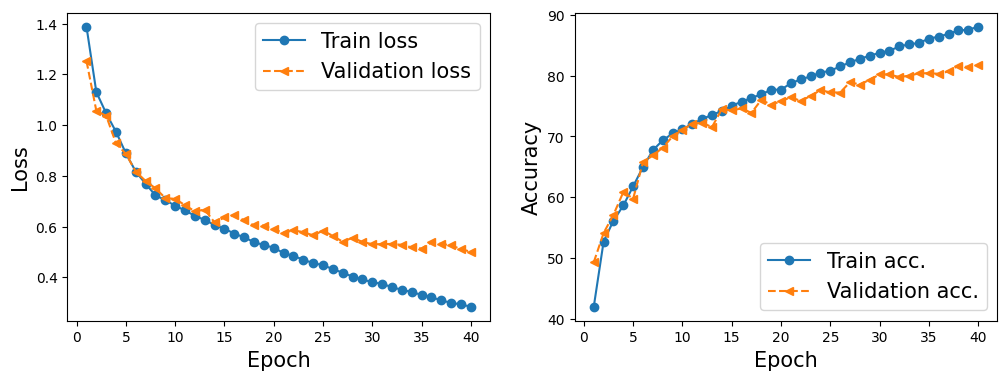

In [20]:
plot_history(seed_117_hist)

In [21]:
engine.test(test_dl)

Test Loss: 0.5316, Test Accuracy: 81.02%


(0.5316159219204725, 81.02404428299602)

## Seed 192

In [22]:
base_dir = './data/lstm_features_labels/'

train_datasets = TransportModeDataset(base_dir, mode='train')
val_test_datasets = TransportModeDataset(base_dir, mode='valid')

np.random.seed(192)
valid_datasets, test_datasets = random_split(val_test_datasets, [0.5, 0.5])

batch_size = 64
train_dl = DataLoader(train_datasets, batch_size, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_datasets, batch_size, shuffle=True, num_workers=4)
test_dl = DataLoader(test_datasets, batch_size, shuffle=False, num_workers=2)

In [23]:
np.random.seed(192)

criterion = nn.CrossEntropyLoss(weight=class_weights)
model = BiLSTMNetwork(input_size=6, hidden_size=300, num_layers=1, dropout=0.494697) #drop is technically == 0 since n_layers == 1
optimizer = optim.AdamW(model.parameters(), lr=0.00769697, weight_decay=0.0756331)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.931817)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

In [24]:
engine = biLSTM_engine(model, optimizer, scheduler, criterion, device)

Train time: XXX

In [25]:
np.random.seed(192)

seed_192_hist = engine.train_validation(train_dl, valid_dl, epochs=40, save_path='./model_checkpoint/seed_192_transpMode_BiLSTM_chkpt.pth')

np.save('./model_checkpoint/seed_192_transpMode_BiLSTM_history.npy', np.array(seed_192_hist))

   Epoch [1/40], Train Loss: 1.3429, Train Accuracy: 43.11%, Val Loss: 1.1141, Val Accuracy: 49.91%
   Epoch [2/40], Train Loss: 1.0704, Train Accuracy: 54.52%, Val Loss: 1.0133, Val Accuracy: 55.85%
   Epoch [3/40], Train Loss: 0.9291, Train Accuracy: 60.27%, Val Loss: 0.8738, Val Accuracy: 61.80%
   Epoch [4/40], Train Loss: 0.8270, Train Accuracy: 64.76%, Val Loss: 0.7872, Val Accuracy: 67.05%
   Epoch [5/40], Train Loss: 0.7744, Train Accuracy: 67.53%, Val Loss: 0.7952, Val Accuracy: 66.95%
   Epoch [6/40], Train Loss: 0.7429, Train Accuracy: 68.86%, Val Loss: 0.7659, Val Accuracy: 67.69%
   Epoch [7/40], Train Loss: 0.7268, Train Accuracy: 69.82%, Val Loss: 0.7256, Val Accuracy: 69.84%
   Epoch [8/40], Train Loss: 0.6875, Train Accuracy: 70.95%, Val Loss: 0.7328, Val Accuracy: 68.99%
   Epoch [9/40], Train Loss: 0.6656, Train Accuracy: 71.78%, Val Loss: 0.6885, Val Accuracy: 72.52%
   Epoch [10/40], Train Loss: 0.6387, Train Accuracy: 73.17%, Val Loss: 0.6841, Val Accuracy: 71.32%

RuntimeError: CUDA error: unknown error
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
plot_history(seed_192_hist)

In [ ]:
engine.test(test_dl)